* Veri seti elimize ilk geldiğinde onu görselleştirmeyi düşünmektense; onu anlamayı, irdelemeyi ve anlamlı parçacıkların neler olduğunu tespit etmeyi öğrenmemiz lazım.

* Örneğin pandas sadece dataframelerden oluşmaz, görselleştirme de yapılabilir. Aynı şekilde seabornda da sadece görselleştirme yoktur. Veri setleri, ve veri setleri üzerinde temel çalışamlar yapılablir. Hatta hazır veri setleri bile vardır.

#### ! Bu proje Mustafa Vahit Keskin'in (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning kursundan eklemeler, çıkarmalar yapılarak hazırlanmıştır. Emeklerinden dolayı teşekkürler

# Veri Seti Yapısının İncelenmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import seaborn as sns
planets = sns.load_dataset("planets")

In [2]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


* Her şeyden önce veri setinin bir kopyasını alarak başlarız ve planets veri setini ham olarak bırakırız.

In [3]:
df = planets.copy()
# eğer direkt eşitleme yapsaydık, df üzerinde yapılan bir değişiklik planets veri setini de etkileyebilirdi.

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


* RangeIndex kısmında kaç satır değer olduğuna bak. 
* Object --> Kategorik değişken, Float/Int --> Kesikli veya Sürekli sayısal değişkenler
* dtypes --> sütunların veri tipleri neler

In [6]:
df.method = pd.Categorical(df.method)

df.info() 

* Bir çok gelişmiş fonksiyon object tipini kategori olarak algılasa da bazı özel fonksiyonlar bunu yapmaz ve bazı istenmeyen hatalar elde edilebilir. Bunun önlenmesi için object olan değerleri category'e dönüştürürsek daha iyi olur.

# Veri Setinin Betimlenmesi

In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T
# Transpozunu almak daha mantıklı ve istediğimiz tarzda sonuç verir.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


* number -> min değer 1 max değer 7 ; yani keşfedilen galaksilerdeki gezegen sayılarını ortalama olarak 1-7 arasıymış.
* orbital_period --> yörünge periyodu büyüklüğü çok fazla olanlar var <br><br>
* !! std ne kadar az ise, min ve max değeri arası çok fazla değil, ve ortalama bir değerde seyir var demektir<br><br>
* year değişkenini daha sonrasında year olarak tanımlayacağız çünkü bu şekilde gerekli analizler yapılamaz<br><br>

* !! Sadece std ve mean arası orana bakarak homojenlik tespit edemeyiz. Sadece outlier değerlerin ne kadar fazla olup olmadığı hakkında bir yorum ortaya atabiliriz.

In [10]:
df.isnull().any() # değişkenlerde eksik değerler(gözlemler) var mı?

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [11]:
df.isnull().sum() # hangi değişkende kaçar tane eksik değer var?

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [12]:
df.isnull().any().sum() # Toplam boş gözlem değerini verir.

3

<font color ="purple"> 
* df["degisken_ismi"].fillna(0,inplace=True) diyerek o sütundaki boş değeleri 0 yapabiliyoruz.
</color>

In [13]:
df["orbital_period"].fillna(0,inplace=True)

In [14]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

<font color ="purple"> 
* df["degisken_ismi"].fillna(df.degisken_ismi.mean(),inplace=True) diyerek o sütundaki boş değeleri ortalama değer yapabiliyoruz.
</color>

In [15]:
df["mass"].fillna(df.mass.mean(),inplace=True)

<font color ="purple"> 
* df.fillna(df.mean(),inplace=True) diyerek tüm boş değerleri ortalama ile dolduruyoruz.
</color>

In [16]:
df.fillna(df.mean(),inplace=True)

In [17]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

#### Bu tarz doldurma işlemleri çok üstünkörü olduğu için önerilmez. Bu nedenle önceki ham veriyi tekrardan elde eder ve onun üzerinden devam ederiz

In [18]:
df = planets.copy()
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

# Kategorik Değişken Özetleri

#### Sadece kategorik değişkenlerin özetleri

In [19]:
cat_df = df.select_dtypes(include=["object"])
cat_df.head() 

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


#### Kategorik değişkenin sınıflarına ve sınıf sayısına erişmek

In [20]:
cat_df.method.unique() # kategori değerleri neler?

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [21]:
cat_df.method.value_counts().count() # kaç farklı kategori değeri var?

10

In [22]:
cat_df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [23]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [24]:
df1 = planets.copy()

In [25]:
df1.mass.fillna(0,inplace=True)

In [26]:
df1.orbital_period.fillna(0,inplace=True)

In [27]:
df1.astype({"orbital_period":float,"mass":int})

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7,77.40,2006
1,Radial Velocity,1,874.774000,2,56.95,2008
2,Radial Velocity,1,763.000000,2,19.84,2011
3,Radial Velocity,1,326.030000,19,110.62,2007
4,Radial Velocity,1,516.220000,10,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,0,172.00,2006
1031,Transit,1,2.615864,0,148.00,2007
1032,Transit,1,3.191524,0,174.00,2007
1033,Transit,1,4.125083,0,293.00,2008


In [28]:
df1.year = pd.to_datetime(df1.year)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    1035 non-null float64
mass              1035 non-null float64
distance          808 non-null float64
year              1035 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 48.6+ KB


In [30]:
df1.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,1970-01-01 00:00:00.000002006
1,Radial Velocity,1,874.774,2.21,56.95,1970-01-01 00:00:00.000002008
2,Radial Velocity,1,763.000,2.60,19.84,1970-01-01 00:00:00.000002011
3,Radial Velocity,1,326.030,19.40,110.62,1970-01-01 00:00:00.000002007
4,Radial Velocity,1,516.220,10.50,119.47,1970-01-01 00:00:00.000002009


In [31]:
df1.loc[:5,["number","orbital_period"]]

,number,orbital_period
0,1,269.300
1,1,874.774
2,1,763.000
3,1,326.030
4,1,516.220
5,1,185.840


#### Kategorik değişkenin sınflarının frekansına erişmek

In [32]:
cat_df.method.value_counts() # kategori değerlerinin adetleri(girdi sayıları/tekrarları) ne kadar? 

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

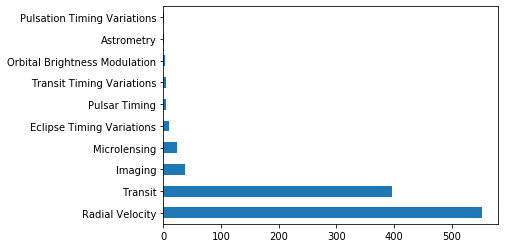

In [33]:
cat_df.method.value_counts().plot.barh(); # çok temel bir görselleştirme

# Numerik Değişkenlerin Özellikleri

In [34]:
df_num = df.select_dtypes(include=["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [35]:
# df_num.describe().T diyerek tüm betimsel istatistiğe ulaşabiliriz
# ama bunun yerine değişken indexli olarak da inceleme gerçekleştirebiliriz.

df_num.distance.describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

# Dağılım Grafikleri
* Not : !! Hangi işlemi yapacak olursan ol, yeni bir dataset ile karşılaştığın anda temel incelemeleri yapmayı ihmal etme.

In [36]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* Review of DataSet<br><br>
cut --> kalite<br><br>
color --> from J(worst) D(best)<br><br>
clarity --> temizliği (I1(worst), IF(best))<br><br>
depth -- > toplam derinlik yüzdesi<br><br>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [39]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [40]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<font color="blue" size="4px">
    * Cut(kalite), Color gibi değişkenler ""nominal değil ordinal"". Yani bir düzey/sınıf ifade ediyorlar. Python böyle bir sıralamanın ve düzey ifadesinin varlığını bilmediği için bunu programa ifade etmemiz lazım. 
</font>

In [41]:
from pandas.api.types import CategoricalDtype

In [42]:
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
# kategori sıralamasını kötüden iyiye doğru yaptık, birazdan eşitleme ve uygulamayı gerçekleştireceğiz.

In [43]:
df.cut = df.cut.astype(CategoricalDtype(categories=cut_categories,ordered=True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

## Bar Plot

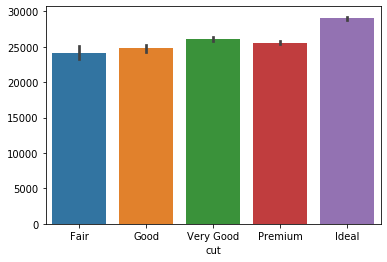

In [44]:
sns.barplot(x="cut",y=df.cut.index, data=df);

In [45]:
df.cut.index[0:30]

RangeIndex(start=0, stop=30, step=1)

### Çaprazlamalar

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


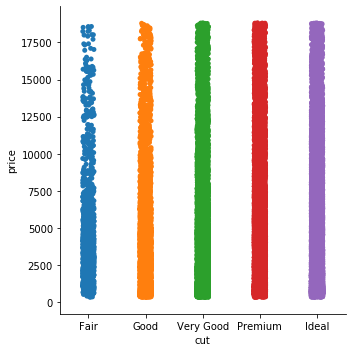

In [47]:
sns.catplot(x="cut",y="price",data=df);
# fair'in yüksek fiyatlardaki yoğunluğu ve ideal'in yoğunluğunu kıyaslayabiliriz.

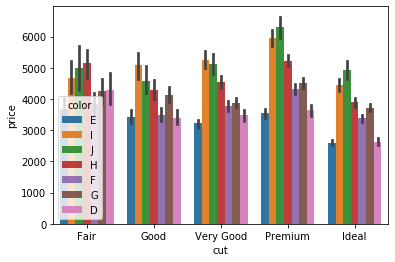

In [48]:
sns.barplot(x="cut",y="price",hue="color",data=df);

* Demek ki : elimizdeki değişkenleri görselleştirince görsellerin üzerine yeni boyutlar ve kırınımlar eklenince ek bilgiler elde edebilyoruz
* 2 yerine 3 veri ile bir grafik inceleyerek daha kapsamlı ve doğru bilgiye erişimi kolaylaştırmış olduk.
    * Yukardaki catplot'da price değeri 0-17500 arasındayken burada 0-6000 arasında. Çünkü yeni bir parametre eklendi, bu nedenle ortalama bir price değeri alındı, ve std değerleri oluştu

In [49]:
df.groupby(["cut","color"])["price"].mean()
# örneğin buraya bakarsak "very good"daki J değeri ortalaması 51000, aynen yukardaki grafik gibi

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### Histogram

* Unutma, histogram ve yoğunluk grafiklerinde amaç frekans/yoğunluğun ölçülmesidir. <b>Bu nedenle tek bir x ekseni değişkeni vardır. </b>

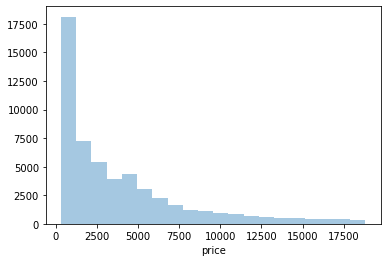

In [50]:
sns.distplot(df.price,bins=20,kde=False);
# 20 tane bar ile price frekansını özetle demek istedik.

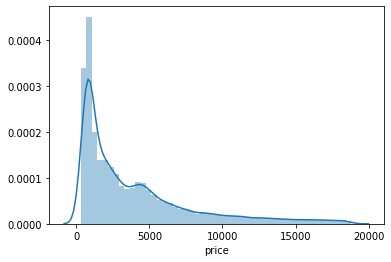

In [51]:
sns.distplot(df.price,bins=50,kde=True);
# Üzerine yoğunluk grafiğini de ekledik.

* Histograma baktığımzda, price değerinin çarpık olduğunu, homojen olmadığını, standart sapmasının da muhtemelen çok fazla olduğunu anlamış olduk

In [52]:
df.price.describe() # burada da gördüğümüz gibi std çok fazla. min ve max arası çok fazla

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

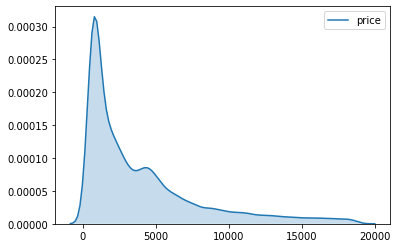

In [53]:
sns.kdeplot(df.price,shade=True);
#price değerinin yoğunluk grafiği

#### Çaprazlamalar 
* Tek başına bir yoğunluk grafiği bağımlı/hedef değişkenimizi anlamaya yetmeyebilir. 
* Önceki örneklerde de bahsettiğimiz gibi, grafikte parametre sayısı arttıkça anlam çıkarma yüzdemiz de artar. Bu nedenle hue olarak cut(kalite) değişkenini de koyup belirli düzenlemeler yaparak bir yoğunluk grafik kümesi oluşturacağız.

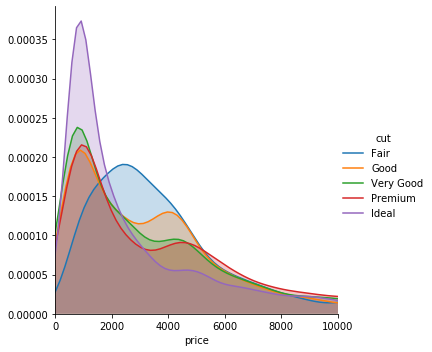

In [54]:
(sns
 .FacetGrid(df,hue="cut",height=5,xlim=(0,10000)) # xlim --> x ekseninde hangi değer aralığı görünsün(geri kalanın çok ayırt edici tarafı yoktu, bu nedenle 10k'ya kadar seçtik)
 .map(sns.kdeplot,"price",shade=True) # map olarak genel yoğunluk grafiği kodları
 .add_legend() # ayrıntıların görünmesi için
);

* Ideal sınıf en kaliteli olduğu için en pahalı değerleri oluşturduğunu düşünürdük ama burada baktığımızda 6000'den sonra fiyatlar az çok aynı, ideal sınıfı ise 0-2000 arasında çok fazla. Buradan da anlıyoru ki, ideal cut değerine sahip olanlar çok pahalı değil ama çok fazla satış oranına sahip, özellikle 0-2000 arasında.

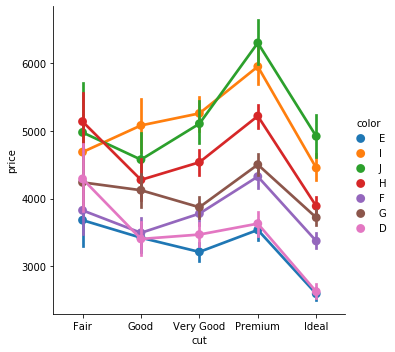

In [55]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

* Makine öğrenmesinde temel amaç, bağımlı/hedef değişkenin bilgilerini diğer değişkenlerce analiz etmek, açıklamak ve anlamlı bir sonuca varmaktır. 
    * Buradan da anlıyoruz ki price değişkeni için color ve cut değişkenleri bir araya geldiğinde anlamlı bir bütün oluşturuyorlar. (örneğin ideal değeri sabitken color değeri her değiştiğinde fiyat da değişime uğruyor.)

### Box Plot

#### Veri Seti Hikayesi
* total_bill : yemeğin toplam fiyatı
* tip : bahşiş
* sex : ücreti ödeyen kişinin cinsiyeti
* smoker : grupta sigara içen kişi var mı?
* day : 3->Thursday, 4->Friday, 5->Saturday
* time : 0->Day, 1->Night
* seze : grupta kaç kişi var?

    * Numerik değişkenleri describe ile, kategorik değişkenleri de value_counts() ile temel olarak irdelemeyi sakın ola ki ihmal etme

In [56]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


* cinsiyetin hesaba veya bahşişe etkisi var mı?
* grupta birden fazla kişi olmasının bahşişe bir etkisi var mı?
* sigara içme ile ödenen hesap arasında bir bağlantı var mı?
* grubun kalabalıklığı ile yenilen öğünün bir ilişkisi var mı?
    * gibi soruların cevaplarını irdeleyebiliriz.

In [58]:
def bar_plot(variable):
    var = df[variable]
    value = var.value_counts()
    plt.figure(figsize=(5,3))
    plt.bar(value.index,value)
    
    plt.title("Frequency of Categorcal variables")
    plt.xlabel("Variable indexes")
    plt.ylabel("Variable Frequency")
    
    print(f"{variable}:\n{value}\n--------------")

sex:
Male      157
Female     87
Name: sex, dtype: int64
--------------
smoker:
No     151
Yes     93
Name: smoker, dtype: int64
--------------
time:
Dinner    176
Lunch      68
Name: time, dtype: int64
--------------
day:
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
--------------


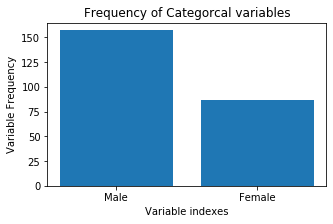

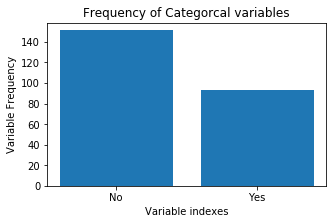

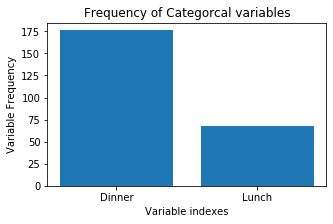

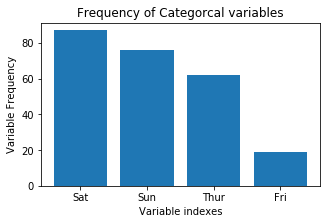

In [59]:
category = ["sex","smoker","time","day"]
for i in category:
    bar_plot(i)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


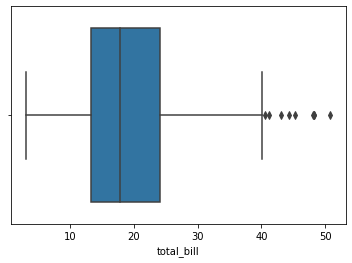

In [61]:
sns.boxplot(df.total_bill);

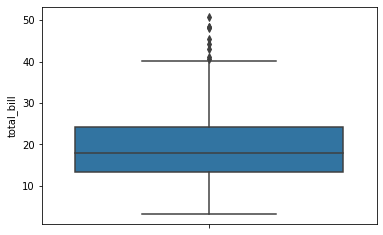

In [62]:
sns.boxplot(df.total_bill,orient="v");

#### Box PLot çaprazlamalar

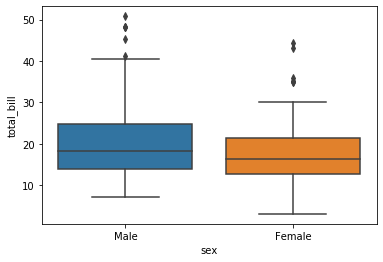

In [63]:
# Cinsiyet ile toplam ödenen tutar arasındaki ilişki nedir?
sns.boxplot(x="sex",y="total_bill",data=df);

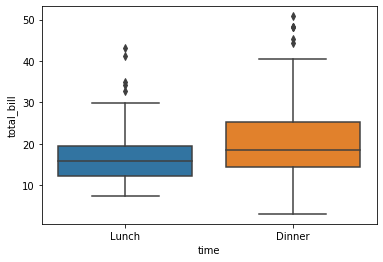

In [64]:
# Kahvaltıda mı akşam yemeğinde mi daha fazla gelir elde ediyoruz?
sns.boxplot(x="time",y="total_bill",data=df);

* Mesela bir restoran için veri bilimciliği yapıyor olsak, buraya bakınca akşam yemeği için daha fazla ücret ödendiğini görürüz. Bunun nedeni yemeklerin fiyatı veya insanların kalabalığı olabilir. Eğer insanların kalabalığı ise, o saatlerde daha kalifiye elemanlarını çalıştırmalarını veya daha fazla eleman çalıştırmaları gerektiği gibi tavsiyeler verebilriiz.

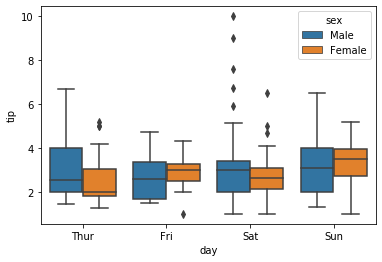

In [65]:
# hangi günler daha fazla bahşiş bırakılıyor ve hangi öğünlerde daha fazla?
sns.boxplot(x="day",y="tip",hue="sex",data=df);

### Violin Grafiği

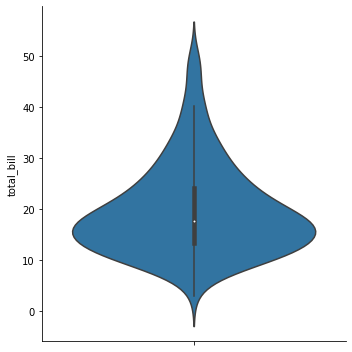

In [66]:
sns.catplot(y="total_bill",kind="violin",data=df);

### Korelasyon ve Scatter PLot
* Bir ilişki durumunu görselleştirmek istersek scatter plot'a başvururuz. <b>Maine öğrnemesinde temel olan şey ilişkişerdir ve makine öğrenmesinin de en temel plot'u scatter plottur.</b>

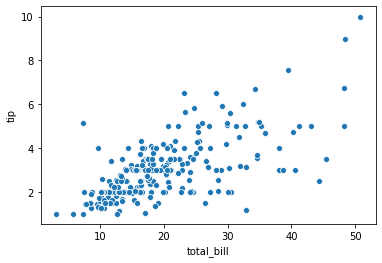

In [67]:
sns.scatterplot(x="total_bill",y="tip",data=df);

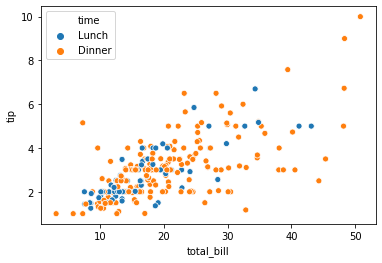

In [68]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

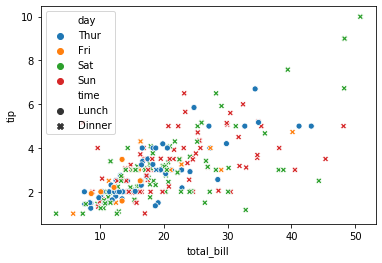

In [69]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df); 
# 4'lü parametre bazında bir çaprazlama yaptık.

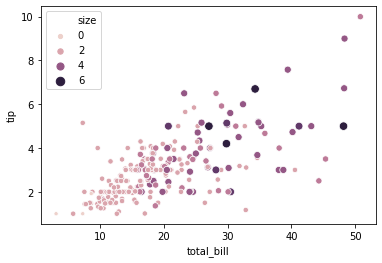

In [70]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df); 

* <b> Doğrusal ilişkinin gösterilmesi:

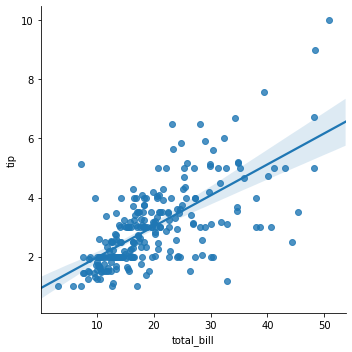

In [71]:
sns.lmplot(x="total_bill",y="tip",data=df);

    * Gerçekten de doğrusal bir ilişkinin olduğunu çizginin eğimi ile görebiliyoruz.

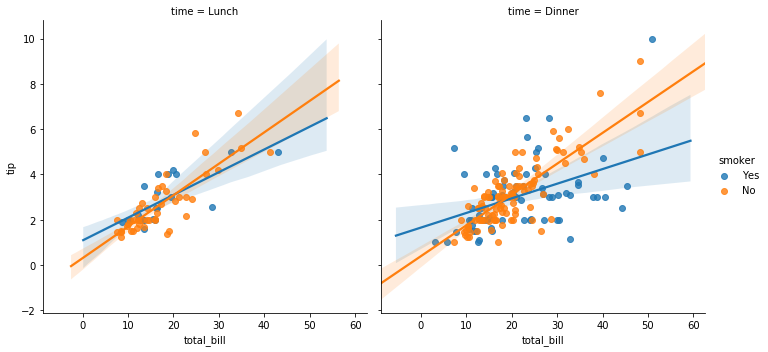

In [72]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df);

    * Her 2 grafikte de anladığımız, sigara içmeyenlerin içenlere göre daha fazla bahşiş verdiğidir. 
    * Ama sadece 2-3 değer ilişkisine bakıp net tespitler yapamayız. Çok daha fazla parametreyi dikkatlice irdelememiz gereklidir.

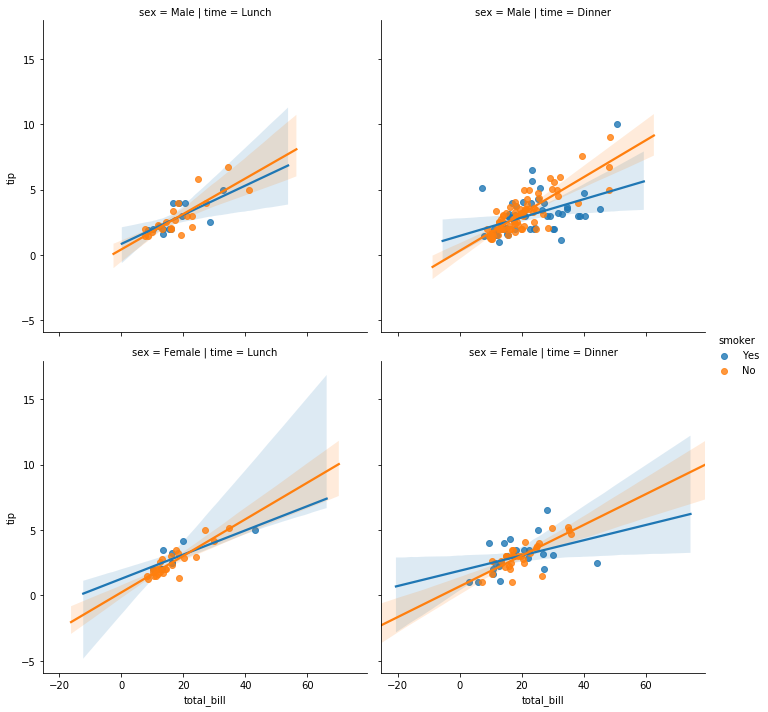

In [73]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df);

#### Scatter PLot Matrisi

In [74]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [77]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

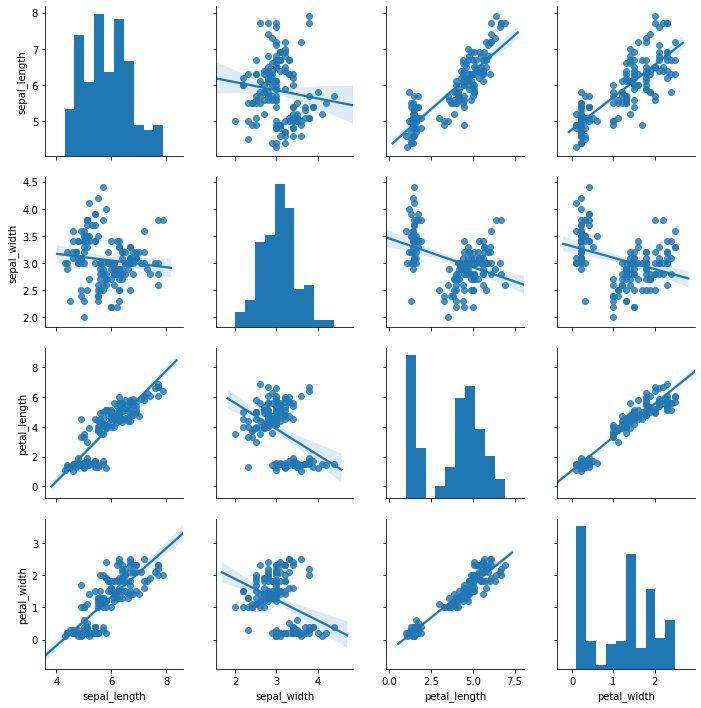

In [78]:
sns.pairplot(df,kind="reg");

    * Pairplot yani scatterplot matrisinde dikkat etmemiz gereken unsur şunlar:
    1.Birim matris ekseninde, o değişkenin histogram(frekans) grafği mevcuttur. Diğer taraflarda ise 2 değişken arası ilişki.
    2.Eğer bu ilişki toz bulutu şeklindeyse(anlamlı bir çizgi çizilemeyecek gibi) o değişkenler arasında anlamlı ilişki yok gibidir.
    3.Eğer noktalar birbirinden farklı köşelerde kümelenmişse, çaprazlama durumu uygulandığında bir anlam çıkabileceği düşünülmeldir.
    ---> Bu nedenle nu grafği, bağımlı değişken olabilecek bir hue ile irdelersek çok daha mantıklı bir sonuca ulaşabiliriz.

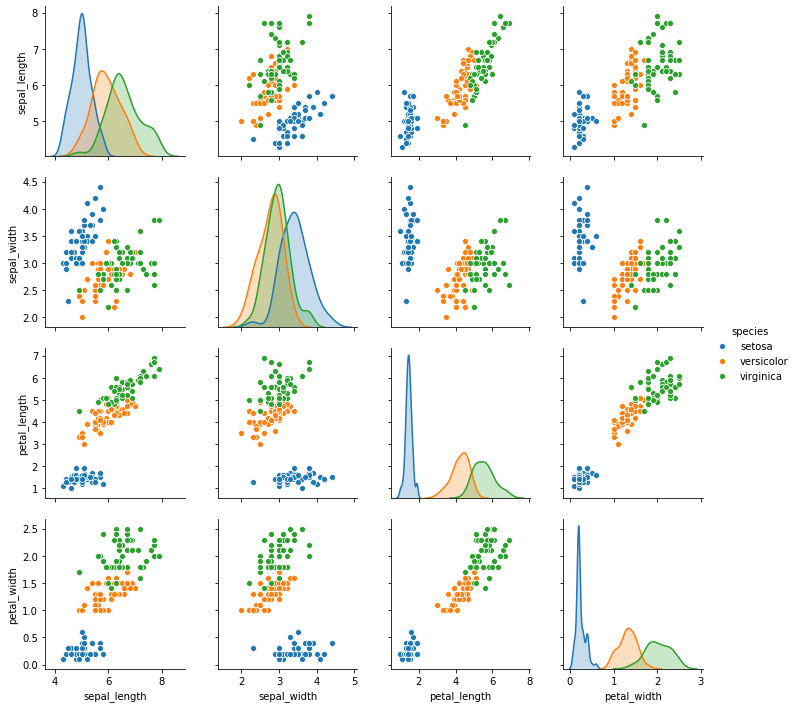

In [79]:
sns.pairplot(df,hue="species");

    * Mesele pental_length küçük-pental_width de küçükken "setosa"
    * ikisi biraz daha arttığında "versicolor"
    * ikisi çok fazla olduğunda "virginica" elde edilebildiğini görmüş olduk

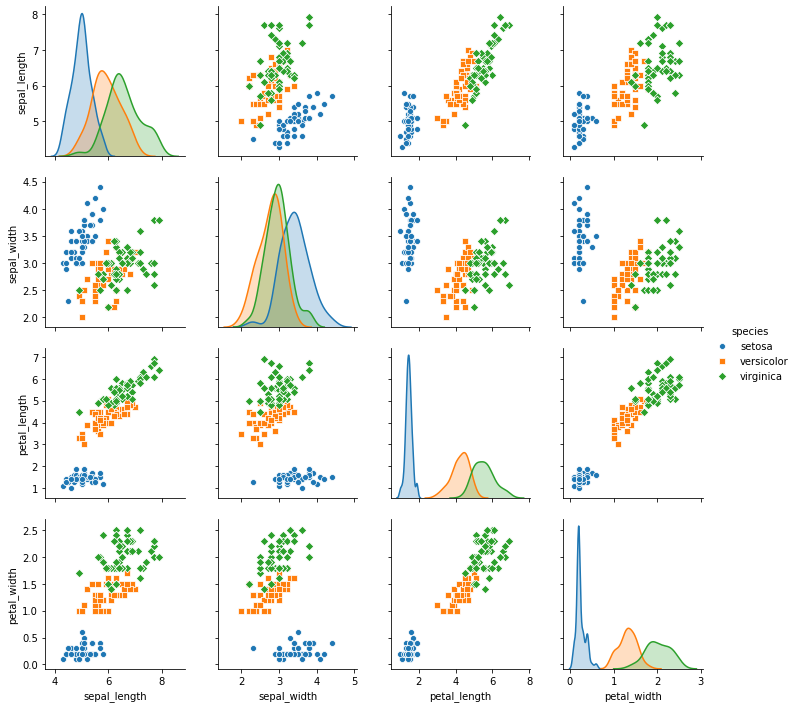

In [80]:
sns.pairplot(df,hue="species",markers=["o","s","D"]);

### HeatMap (Isı Haritası)

In [81]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [82]:
df.info()
# totalde 144 gözlem yapıldığını görmüş olduk.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [84]:
df.month.value_counts()

December     12
November     12
October      12
September    12
August       12
July         12
June         12
May          12
April        12
March        12
February     12
January      12
Name: month, dtype: int64

#### Pivotting
* Bu tarz tablolarda kolay okunmayı artırmak için pivotlama yapılır.
    * Örneğin burada yıllar x ekseninde, aylar y ekseninde olsa 12 satırda tüm tabloyu özetlemiş oluruz.
        * <b>df.pivot("x_ekseni","y_ekseni","bağımlı değişken")</b>

In [85]:
df = df.pivot("month","year","passengers") 
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


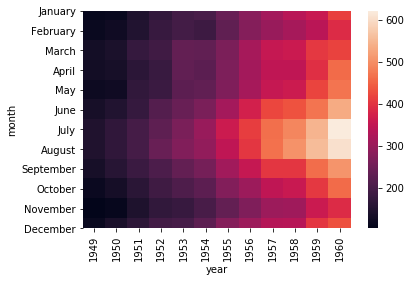

In [86]:
sns.heatmap(df);

    * Yıllar geçtikçe yolcu sayılarında bir artış gözlenmekte. Ama özellikle son yılların -haziran,temmuz,ağustos- aylarında yolcu sayıları çok fazla artmış. 

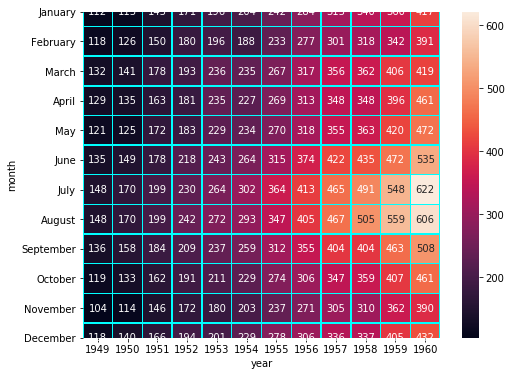

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(df,annot=True,fmt="d",linewidths=".5",linecolor="cyan");

### Çizgi Grafiği ve Çaprazlamalar
* Biraz daha zor bir grafiktir. Özellikele zamana bağlı değişkenlerin olduğu durumlarda ve IOT, makine öğrenmesi, sinyal izlenmesi gibi durumlarda sıkça kullanılan bir görselleştirme yöntemidir.

In [88]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


    * subject: değişkenlerin toplandığı kişi sayısı.
    * timepoint: zaman noktaları
    * event: verinin toplanması ile alakalı olaylar.
    * region : sinyalin toplandığı bölge
    * signal : gelen sinyal

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [90]:
df.shape
#1064 gözlem var

(1064, 5)

In [91]:
df.describe().T
# median-mean ilişkisini timepoint'de çok rahatça görebiliriz.
# doğrusal bir artma olduğu için hiç çarpıklık yok, bu nedenle median=mean

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


subject:
s5     76
s8     76
s7     76
s6     76
s10    76
s2     76
s4     76
s12    76
s3     76
s0     76
s9     76
s1     76
s11    76
s13    76
Name: subject, dtype: int64
--------------
event:
stim    532
cue     532
Name: event, dtype: int64
--------------
region:
frontal     532
parietal    532
Name: region, dtype: int64
--------------


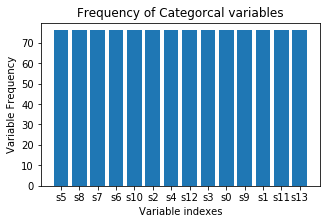

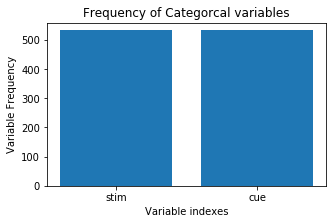

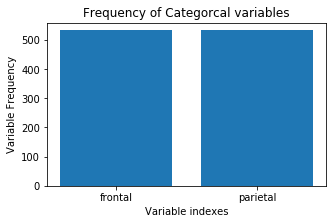

In [92]:
object = ["subject","event","region"]
for i in object:
    bar_plot(i)

In [93]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

    * Buradan da görüyoruz ki her bir zaman noktasına göre eşit sayıda sinyal toplanmış.
    * Bu da muhtemelen ölçümün mekanik olduğunu gösterir.

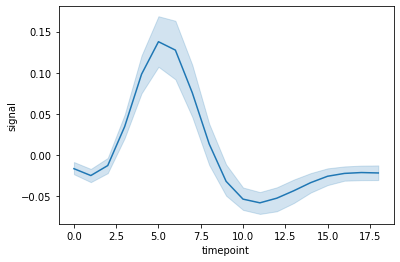

In [94]:
sns.lineplot(x="timepoint",y="signal",data=df);

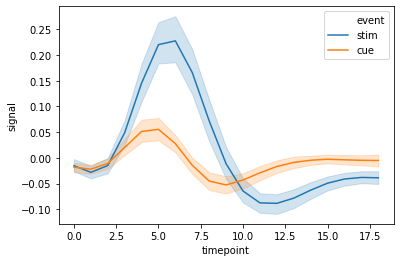

In [95]:
sns.lineplot(x="timepoint",y="signal",hue="event",data=df);

    * Buradan da şunu anlıyoruz ki event değişkenindeki stim olayı, sinyalin durumunu etkileyen çok önemli bir etken

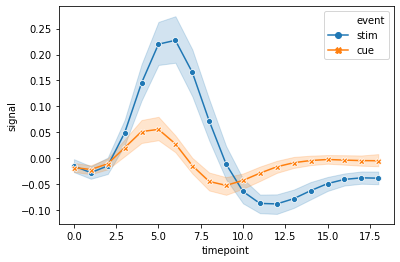

In [96]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",
             markers=True,dashes=False,data=df);

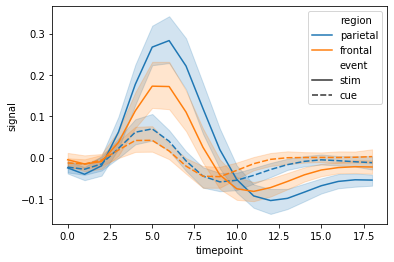

In [97]:
sns.lineplot(x="timepoint",y="signal",hue="region",style="event",data=df);

    * Anlıyoruz ki temel olarak sinyali etkileyen şey stim değilmiş. Hatta eventlardaki sinyal değişim aralığı bile çok az.
    * Ama perietal ve frontal'in sinyal aralığına baktığımızda çok daha etken ve belirleyici olduğunu görüyoruz.

### Basit Zaman Serisi Grafiği

In [98]:
!pip install pandas_datareader
import pandas_datareader as pr

In [99]:
df = pr.get_data_yahoo("AAPL",start="2016-01-01", end ="2019-05-21")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.400942
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.789471
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.323915
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.339539
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.457672


In [100]:
df.shape

(851, 6)

In [101]:
kapanis = df.Close
kapanis.head()

# Kapanış değerleri bazında inceleme yapmak istedik

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

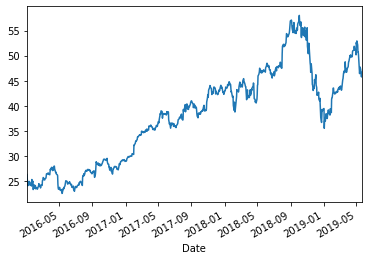

In [102]:
kapanis.plot()

    * 4 aylık fark baz alarak tüm zaman aralığındaki kapanış değerlerinin çizimini gerçekleştirdik.

In [103]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

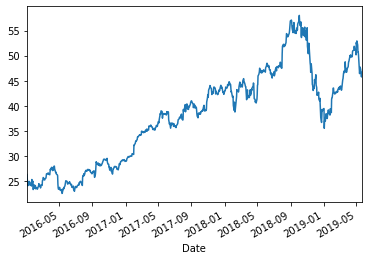

In [104]:
kapanis.plot()

* Genelde DatetimeIndex olması gereken ifadeler başka bir veri tipi ile yazılıyorlar. Ve grafiksel çizimlerde anlamsızlıklar oluyor. Bunu önlemek için bu ifadeleri DatetimeIndex'e dönüştürürz ve bu işlem yukarıdaki gibi yapılır.